In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["svg.fonttype"] = "none"

In [2]:
masterfile = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/masterfile/all_smOOPS_and_controls_V2.tsv', sep='\t')
masterfile

,chr,start,end,gene_id,feature,strand,gene_name,transcript_id,feature_length,smoops_naive,smoops_epi,smoops_diff,control_common,semi_diff_mean_tpm,semi_epiSC_mean_tpm,semi_naive_mean_tpm,semi_diff_mean_count,semi_epiSC_mean_count,semi_naive_mean_count
0,chr1,3284704,3741721,ENSMUSG00000051951.6,transcript,-,Xkr4,ENSMUST00000070533.5,457017,False,True,True,False,3.872970,2.324972,0.014051,194.333000,235.666667,0.666667
1,chr1,3435953,3438772,ENSMUSG00000103377.2,transcript,-,Gm37180,ENSMUST00000195335.2,2819,False,True,True,False,0.521827,0.301747,0.012481,22.666667,26.666667,0.333333
2,chr1,3445778,3448011,ENSMUSG00000104017.2,transcript,-,Gm37363,ENSMUST00000192336.2,2233,False,False,True,False,0.485116,0.206451,0.000000,14.333333,15.666667,0.000000
3,chr1,3535199,3537508,ENSMUSG00000103025.2,transcript,-,Gm37686,ENSMUST00000194099.2,2309,False,False,True,False,0.627143,0.321620,0.000000,18.000000,24.666667,0.000000
4,chr1,3582673,3584730,ENSMUSG00000103201.2,transcript,-,Gm37329,ENSMUST00000192973.2,2057,False,False,True,False,1.040409,0.393665,0.000000,30.333333,25.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,chrX,160616291,160942726,ENSMUSG00000059493.14,transcript,-,Nhs,ENSMUST00000087085.10,326435,False,True,True,False,0.707368,0.917609,0.077997,91.000000,245.000000,6.000000
3056,chrX,165173028,165223700,ENSMUSG00000040586.9,transcript,-,Ofd1,ENSMUST00000049501.9,50672,False,True,True,False,2.596442,2.308879,1.399653,165.333333,326.725000,86.666667
3057,chrX,168094525,168103276,ENSMUSG00000031352.11,transcript,-,Hccs,ENSMUST00000033717.9,8751,False,False,False,True,8.779636,9.323919,9.318443,270.333333,630.333333,302.000333
3058,chrY,1260770,1286629,ENSMUSG00000069045.12,transcript,-,Ddx3y,ENSMUST00000091190.12,25859,False,True,True,False,12.061610,9.830595,1.813766,633.994667,1141.029333,96.344667


In [3]:
clusters_all = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Results/machine_learning_results/cluster_assignment_file/cluster_of_all_model.tsv', sep='\t')
clusters_all

,transcript_id,Cluster
0,ENSMUST00000000199.8,0
1,ENSMUST00000000291.9,0
2,ENSMUST00000000312.12,0
3,ENSMUST00000000314.13,0
4,ENSMUST00000000642.11,0
...,...,...
1819,ENSMUST00000239449.2,0
1820,ENSMUST00000239483.2,0
1821,ENSMUST00000239525.1,0
1822,ENSMUST00000239527.1,0


In [4]:
masterfile_clusters = pd.merge(masterfile, clusters_all, on='transcript_id')
masterfile_clusters

,chr,start,end,gene_id,feature,strand,gene_name,transcript_id,feature_length,smoops_naive,smoops_epi,smoops_diff,control_common,semi_diff_mean_tpm,semi_epiSC_mean_tpm,semi_naive_mean_tpm,semi_diff_mean_count,semi_epiSC_mean_count,semi_naive_mean_count,Cluster
0,chr1,3284704,3741721,ENSMUSG00000051951.6,transcript,-,Xkr4,ENSMUST00000070533.5,457017,False,True,True,False,3.872970,2.324972,0.014051,194.333000,235.666667,0.666667,0
1,chr1,3435953,3438772,ENSMUSG00000103377.2,transcript,-,Gm37180,ENSMUST00000195335.2,2819,False,True,True,False,0.521827,0.301747,0.012481,22.666667,26.666667,0.333333,1
2,chr1,3445778,3448011,ENSMUSG00000104017.2,transcript,-,Gm37363,ENSMUST00000192336.2,2233,False,False,True,False,0.485116,0.206451,0.000000,14.333333,15.666667,0.000000,1
3,chr1,3535199,3537508,ENSMUSG00000103025.2,transcript,-,Gm37686,ENSMUST00000194099.2,2309,False,False,True,False,0.627143,0.321620,0.000000,18.000000,24.666667,0.000000,1
4,chr1,3582673,3584730,ENSMUSG00000103201.2,transcript,-,Gm37329,ENSMUST00000192973.2,2057,False,False,True,False,1.040409,0.393665,0.000000,30.333333,25.333333,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,chrX,158315663,158376077,ENSMUSG00000044150.13,transcript,+,Bclaf3,ENSMUST00000112464.8,60414,False,True,True,False,7.689802,6.577402,11.816828,175.999333,311.999667,228.218000,1
1820,chrX,160616291,160942726,ENSMUSG00000059493.14,transcript,-,Nhs,ENSMUST00000087085.10,326435,False,True,True,False,0.707368,0.917609,0.077997,91.000000,245.000000,6.000000,0
1821,chrX,165173028,165223700,ENSMUSG00000040586.9,transcript,-,Ofd1,ENSMUST00000049501.9,50672,False,True,True,False,2.596442,2.308879,1.399653,165.333333,326.725000,86.666667,1
1822,chrY,1260770,1286629,ENSMUSG00000069045.12,transcript,-,Ddx3y,ENSMUST00000091190.12,25859,False,True,True,False,12.061610,9.830595,1.813766,633.994667,1141.029333,96.344667,1


In [5]:
transcript_data = []

with open('/ceph/hpc/home/novljanj/data_storage/genomes/genome_m39/gencode.vM27.chr_patch_hapl_scaff.annotation.gtf', 'r') as gtf_file:
    for line in gtf_file:
        if line.startswith('#'):
            continue

        columns = line.strip().split('\t')
        attributes = columns[8]

        if 'transcript_id' in attributes:
            gene_name = [field for field in attributes.split(';') if 'gene_name' in field][0]
            gene_name = gene_name.split('"')[1]
            gene_id = [field for field in attributes.split(';') if 'gene_id' in field][0]
            gene_id = gene_id.split('"')[1]
            transcript_id = [field for field in attributes.split(';') if 'transcript_id' in field][0]
            transcript_id = transcript_id.split('"')[1]
            gene_type = [field for field in attributes.split(';') if 'gene_type' in field][0]
            gene_type = gene_type.split('"')[1]

            transcript_data.append(columns[:7] + [gene_id] + [gene_name] + [transcript_id] + [gene_type])

column_names = ['seqname', 'source', 'feature', 'start', 'end', 'score', "strand", "gene_id", "gene_name", 'transcript_id', 'gene_type']

annotation = pd.DataFrame(transcript_data, columns=column_names)
annotation['start'] = annotation['start'].astype(int) - 1
annotation = annotation[annotation['feature'] == 'transcript']
annotation


,seqname,source,feature,start,end,score,strand,gene_id,gene_name,transcript_id,gene_type
0,chr1,HAVANA,transcript,3143475,3144545,.,+,ENSMUSG00000102693.2,4933401J01Rik,ENSMUST00000193812.2,TEC
2,chr1,ENSEMBL,transcript,3172238,3172348,.,+,ENSMUSG00000064842.3,Gm26206,ENSMUST00000082908.3,snRNA
4,chr1,HAVANA,transcript,3276123,3286567,.,-,ENSMUSG00000051951.6,Xkr4,ENSMUST00000162897.2,protein_coding
7,chr1,HAVANA,transcript,3276745,3285855,.,-,ENSMUSG00000051951.6,Xkr4,ENSMUST00000159265.2,protein_coding
10,chr1,HAVANA,transcript,3284704,3741721,.,-,ENSMUSG00000051951.6,Xkr4,ENSMUST00000070533.5,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...
1814209,JH584299.1,ENSEMBL,transcript,910288,913083,.,-,ENSMUSG00000095475.2,ENSMUSG00000095475,ENSMUST00000180208.2,protein_coding
1814219,JH584299.1,ENSEMBL,transcript,921941,924675,.,+,ENSMUSG00000094855.2,ENSMUSG00000094855,ENSMUST00000178327.2,protein_coding
1814229,JH584303.1,ENSEMBL,transcript,81606,82689,.,+,ENSMUSG00000095019.2,ENSMUSG00000095019,ENSMUST00000178569.2,protein_coding
1814233,JH584304.1,ENSEMBL,transcript,52189,59667,.,-,ENSMUSG00000095041.8,ENSMUSG00000095041,ENSMUST00000179505.8,protein_coding


In [6]:
masterfile_clusters_annotation = pd.merge(masterfile_clusters, annotation, on='transcript_id')
masterfile_clusters_annotation

,chr,start_x,end_x,gene_id_x,feature_x,strand_x,gene_name_x,transcript_id,feature_length,smoops_naive,...,seqname,source,feature_y,start_y,end_y,score,strand_y,gene_id_y,gene_name_y,gene_type
0,chr1,3284704,3741721,ENSMUSG00000051951.6,transcript,-,Xkr4,ENSMUST00000070533.5,457017,False,...,chr1,HAVANA,transcript,3284704,3741721,.,-,ENSMUSG00000051951.6,Xkr4,protein_coding
1,chr1,3435953,3438772,ENSMUSG00000103377.2,transcript,-,Gm37180,ENSMUST00000195335.2,2819,False,...,chr1,HAVANA,transcript,3435953,3438772,.,-,ENSMUSG00000103377.2,Gm37180,TEC
2,chr1,3445778,3448011,ENSMUSG00000104017.2,transcript,-,Gm37363,ENSMUST00000192336.2,2233,False,...,chr1,HAVANA,transcript,3445778,3448011,.,-,ENSMUSG00000104017.2,Gm37363,TEC
3,chr1,3535199,3537508,ENSMUSG00000103025.2,transcript,-,Gm37686,ENSMUST00000194099.2,2309,False,...,chr1,HAVANA,transcript,3535199,3537508,.,-,ENSMUSG00000103025.2,Gm37686,TEC
4,chr1,3582673,3584730,ENSMUSG00000103201.2,transcript,-,Gm37329,ENSMUST00000192973.2,2057,False,...,chr1,HAVANA,transcript,3582673,3584730,.,-,ENSMUSG00000103201.2,Gm37329,TEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,chrX,158315663,158376077,ENSMUSG00000044150.13,transcript,+,Bclaf3,ENSMUST00000112464.8,60414,False,...,chrX,HAVANA,transcript,158315663,158376077,.,+,ENSMUSG00000044150.13,Bclaf3,protein_coding
1820,chrX,160616291,160942726,ENSMUSG00000059493.14,transcript,-,Nhs,ENSMUST00000087085.10,326435,False,...,chrX,HAVANA,transcript,160616291,160942726,.,-,ENSMUSG00000059493.14,Nhs,protein_coding
1821,chrX,165173028,165223700,ENSMUSG00000040586.9,transcript,-,Ofd1,ENSMUST00000049501.9,50672,False,...,chrX,HAVANA,transcript,165173028,165223700,.,-,ENSMUSG00000040586.9,Ofd1,protein_coding
1822,chrY,1260770,1286629,ENSMUSG00000069045.12,transcript,-,Ddx3y,ENSMUST00000091190.12,25859,False,...,chrY,HAVANA,transcript,1260770,1286629,.,-,ENSMUSG00000069045.12,Ddx3y,protein_coding


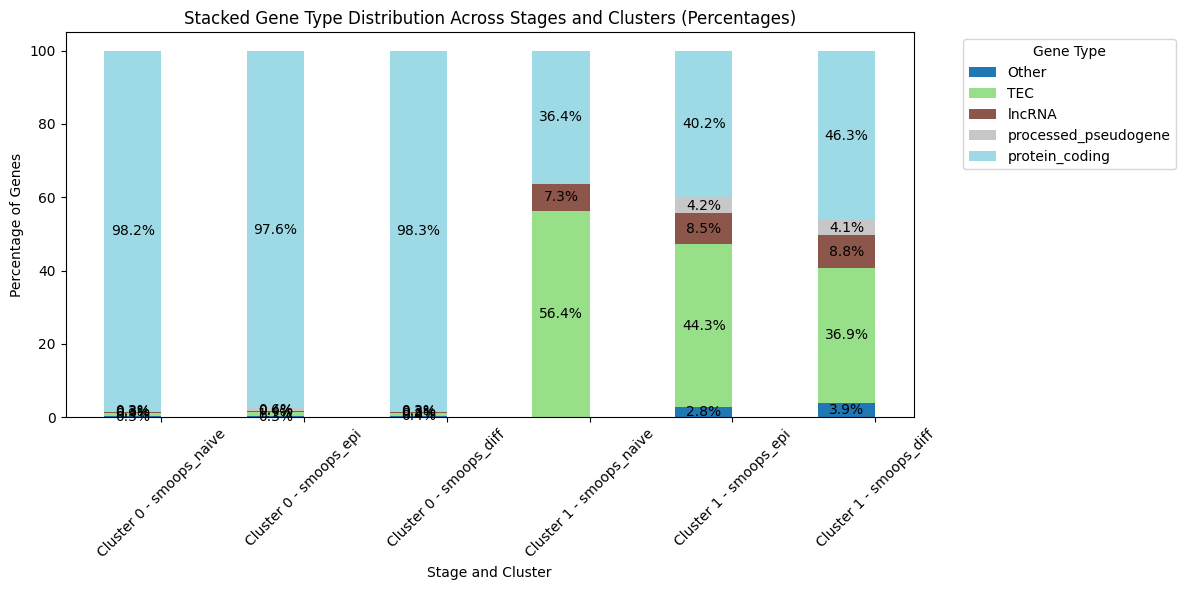

In [7]:
stages = ['smoops_naive', 'smoops_epi', 'smoops_diff']
clusters = [0, 1]

def categorize_gene_type(gene_type):
    if gene_type in ['Mt_rRNA', 'polymorphic_pseudogene', 'unprocessed_pseudogene', "miRNA"] or \
       gene_type.startswith('transcribed_') or \
       gene_type.startswith('translated_'):
        return 'Other'
    return gene_type

masterfile_clusters_annotation['gene_type'] = masterfile_clusters_annotation['gene_type'].apply(categorize_gene_type)

categories = sorted(masterfile_clusters_annotation['gene_type'].unique())
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))
color_dict = {category: color for category, color in zip(categories, colors)}

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.4
x_positions = []

for cluster in clusters:
    for i, stage in enumerate(stages):
        subset = masterfile_clusters_annotation[
            (masterfile_clusters_annotation["Cluster"] == cluster) &
            (masterfile_clusters_annotation[stage])
        ]
        
        gene_type_counts = subset['gene_type'].value_counts()
        counts = [gene_type_counts.get(cat, 0) for cat in categories]
        total = sum(counts)
        
        percentages = [(count / total) * 100 if total > 0 else 0 for count in counts]
        
        x_pos = cluster * len(stages) + i
        x_positions.append(x_pos)
        
        bottom = 0
        for percentage, category in zip(percentages, categories):
            ax.bar(
                x_pos, percentage, width=bar_width, bottom=bottom, 
                color=color_dict[category], label=category if x_pos == 0 else ""
            )

            if percentage > 0:  
                ax.text(
                    x_pos, bottom + percentage / 2, 
                    f'{percentage:.1f}%',  
                    ha='center', va='center', 
                )
            bottom += percentage

ax.set_title("Stacked Gene Type Distribution Across Stages and Clusters (Percentages)")
ax.set_xlabel("Stage and Cluster")
ax.set_ylabel("Percentage of Genes")
ax.set_xticks([x + bar_width / 2 for x in range(0, len(clusters) * len(stages))])
ax.set_xticklabels([f"Cluster {cluster} - {stage}" for cluster in clusters for stage in stages], rotation=45)
ax.legend(title="Gene Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

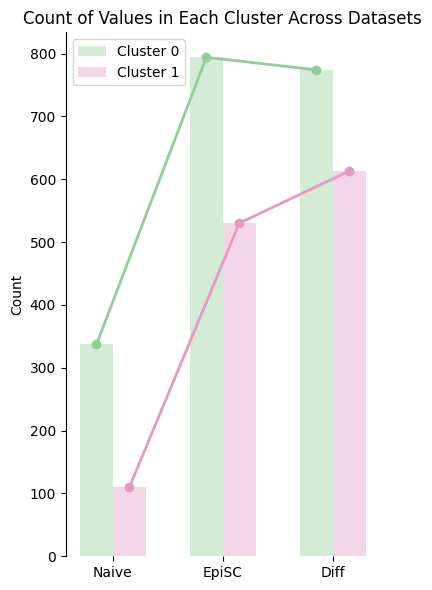

In [8]:
def plot_barplots_absolute(df):
    groups = {
        'Naive': 'smoops_naive',
        'EpiSC': 'smoops_epi',
        'Diff': 'smoops_diff'
    }

    cluster0_counts = []
    cluster1_counts = []

    for group_name, col_name in groups.items():

        subset = df[df[col_name] == True]
        c0 = len(subset[subset['Cluster'] == 0])
        c1 = len(subset[subset['Cluster'] == 1])

        cluster0_counts.append(c0)
        cluster1_counts.append(c1)

    group_names = list(groups.keys())
    x = np.arange(len(group_names))

    fig, ax = plt.subplots(figsize=(4, 6))
    width = 0.3

    cluster_colors = ["#94CE97", "#E39BC4"]

    bar0 = ax.bar(x - width/2, cluster0_counts, width, label='Cluster 0', 
                  color=cluster_colors[0], alpha=0.4)
    bar1 = ax.bar(x + width/2, cluster1_counts, width, label='Cluster 1', 
                  color=cluster_colors[1], alpha=0.4)

    ax.plot(x - 0.15, cluster0_counts, marker='o', color=cluster_colors[0], linewidth=2)
    ax.plot(x + 0.15, cluster1_counts, marker='o', color=cluster_colors[1], linewidth=2)

    ax.set_xticks(x)
    ax.set_xticklabels(group_names)
    ax.set_ylabel('Count')
    ax.set_title('Count of Values in Each Cluster Across Datasets')
    ax.legend()

    plt.tight_layout()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.show()


plot_barplots_absolute(masterfile_clusters)
